# Linear classifiers: `predict`

CPSC 340: Machine Learning and Data Mining

The University of British Columbia

2018 Winter Term 1

Mike Gelbart

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 16

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from plot_classifier import plot_classifier

%autosave 0

Autosave disabled


### Linear decision boundaries and the coefficients

- Key idea: compute $w^Tx$ (or $w^Tx+\beta$) just like in linear regression, but then look at the **sign** of this function to make a prediction. 

$$\hat{y}_i = \textrm{sign}(w^Tx_i)$$

with the convention that $y_i \in \{-1,+1\}$.

We're actually fitting a hyperplane through the space, that divides it in half. The $w$ represents the tilt of the hyperplane and $\beta$ represents the intercept (offset from the origin).

In [2]:
N = 20
X = np.random.randn(N,2)
y = np.random.choice((-1,+1),size=N)
X[y>0,0] -= 1
X[y>0,1] += 1

In [26]:
model = LogisticRegression() # can change to LinearSVC and get the same plot
model.fit(X,y);

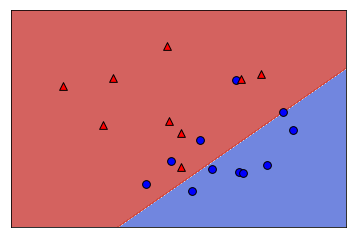

In [42]:
# Let's play with the coefficients and see what they do.
model.coef_ = np.array([[-2,2]])  # this is w
model.intercept_ = np.array([0]) # this is β

# Plot the data and decision boundary
plot_classifier(X,y,model);

Demo: change the coefficients and see what happens.

Question: why do we need 2 coefficients to encode a slope? Indeed, what if we double the coefficients? (Answer coming soon!)

### Probabilities and `predict_proba`

In [29]:
lr = LogisticRegression() # can change to LinearSVC and get the same plot
lr.fit(X,y);

In [30]:
lr.predict(X)

array([-1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1, -1,
       -1,  1,  1])

In [31]:
lr.predict_proba(X)

array([[0.84923746, 0.15076254],
       [0.30446353, 0.69553647],
       [0.70484939, 0.29515061],
       [0.13169318, 0.86830682],
       [0.04848206, 0.95151794],
       [0.29567149, 0.70432851],
       [0.85922498, 0.14077502],
       [0.6163979 , 0.3836021 ],
       [0.76524652, 0.23475348],
       [0.36130019, 0.63869981],
       [0.56618201, 0.43381799],
       [0.88382288, 0.11617712],
       [0.32235287, 0.67764713],
       [0.55064559, 0.44935441],
       [0.05121288, 0.94878712],
       [0.64551218, 0.35448782],
       [0.82263833, 0.17736167],
       [0.80884732, 0.19115268],
       [0.41959643, 0.58040357],
       [0.02637124, 0.97362876]])

Logistic regression can output probabilities of each class. Note that the probabilities add up to 1 for each row. We can plot these probabilities (say the second column).

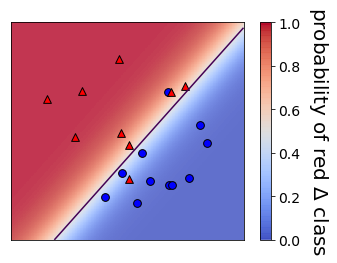

In [32]:
lr = LogisticRegression(C=1e6) # very little regularization, C=1/λ
lr.fit(X,y)
plot_classifier(X,y,lr, proba=True);

Going back to the issue of the scale of the coefficents, let's try changing them now.

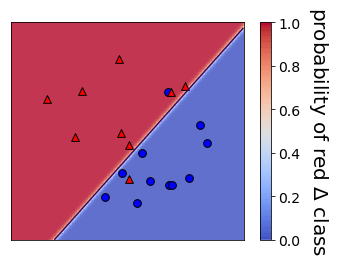

In [33]:
lr.fit(X,y)
lr.coef_      *= 10
lr.intercept_ *= 10

plot_classifier(X,y,lr, proba=True);

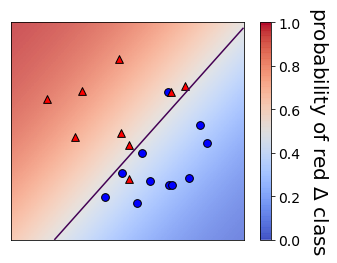

In [34]:
lr.fit(X,y)
lr.coef_      /= 5
lr.intercept_ /= 5

plot_classifier(X,y,lr, proba=True);

Thus, we have an interpretation for regularization here: smaller coefficients means less confident predictions. 

This makes sense -- there's a relationship between overconfidence and overfitting.

### Where do these probabilities come from?

- The probabilities come from a softer version of taking $\textrm{sign}(w^Tx)$. 
- Instead we take $h(w^Tx)$ where $$h(z)\equiv \frac{1}{1+\exp(-z)}$$ 
- This is "squishing" the output from any number to $[0,1]$.

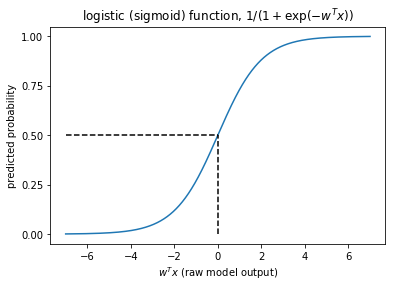

In [43]:
z = np.linspace(-7,7,1000)
plt.plot(z, 1/(1+np.exp(-z)));
plt.plot((0,0),(0,0.5),'--',color='black');
plt.plot((-7,0),(0.5,0.5),'--',color='black');
plt.yticks((0,0.25,0.5,0.75,1));
plt.xlabel("$w^Tx$ (raw model output)");
plt.ylabel("predicted probability");
plt.title("logistic (sigmoid) function, $1/(1+\exp(-w^Tx))$");

- Thus, checking whether the raw model output is positive or negative corresponds to checking whether the probability is greater or less than 0.5. Makes sense!
- Furthermore, making the coefficients larger (e.g. doubling) pushes $w^Tx$ away from zero and towards the edges of the sigmoid. Hence the behaviour we observed.
- We can sort of see the sigmoid in the probability contours above: for small coefficients it appears linear; for large coefficients we see the saturation.

### Interpretation of the coefficients

- Above we've seen a geometric interpretation
- The interpretation from linear regression also holds:
  - the $j$th coefficient tells us how feature $j$ affects the prediction
  - if $w_j>0$ then increasing $x_{ij}$ moves us toward predicting $+1$
  - if $w_j<0$ then increasing $x_{ij}$ moves us toward prediction $-1$
  - if $w_j=0$ then the feature is not used in making a prediction

### Preview of next lecture

- We need a loss function for our linear classifiers.
- Number of errors is not smooth/convex.
- But, maybe, higher probabilities on the correct class?